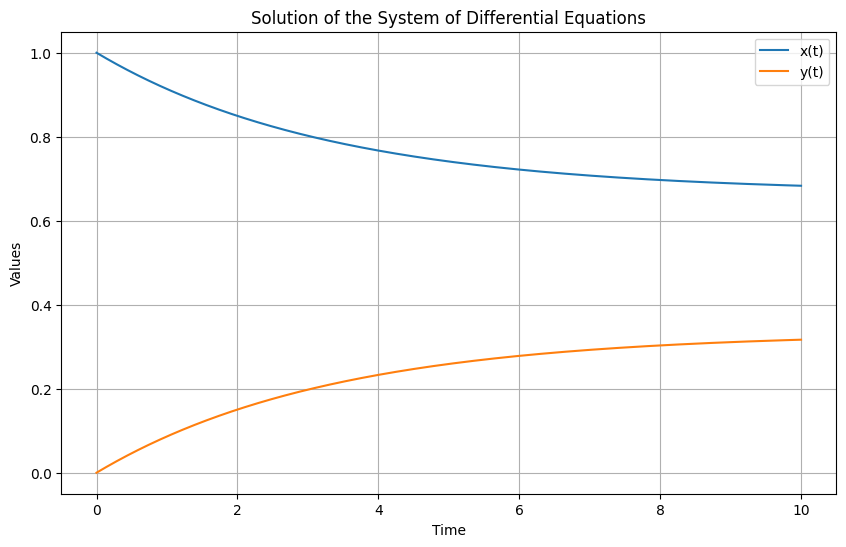

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    dxdt = -0.1*x + 0.2*y
    dydt = 0.1*x - 0.2*y
    return dxdt, dydt

def runge_kutta(f, x0, y0, t0, tf, h):
    num_steps = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, num_steps + 1)
    x_values = np.zeros(num_steps + 1)
    y_values = np.zeros(num_steps + 1)
    x_values[0] = x0
    y_values[0] = y0

    for i in range(num_steps):
        k1x, k1y = f(x_values[i], y_values[i])
        k2x, k2y = f(x_values[i] + 0.5*h*k1x, y_values[i] + 0.5*h*k1y)
        k3x, k3y = f(x_values[i] + 0.5*h*k2x, y_values[i] + 0.5*h*k2y)
        k4x, k4y = f(x_values[i] + h*k3x, y_values[i] + h*k3y)
        x_values[i+1] = x_values[i] + (h/6.0) * (k1x + 2*k2x + 2*k3x + k4x)
        y_values[i+1] = y_values[i] + (h/6.0) * (k1y + 2*k2y + 2*k3y + k4y)

    return t_values, x_values, y_values

# 初期条件
x0 = 1.0
y0 = 0.0
t0 = 0.0
tf = 10.0
h = 0.01

# ルンゲ・クッタ法で解を計算
t_values, x_values, y_values = runge_kutta(f, x0, y0, t0, tf, h)

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label='x(t)')
plt.plot(t_values, y_values, label='y(t)')
plt.title('Solution of the System of Differential Equations')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


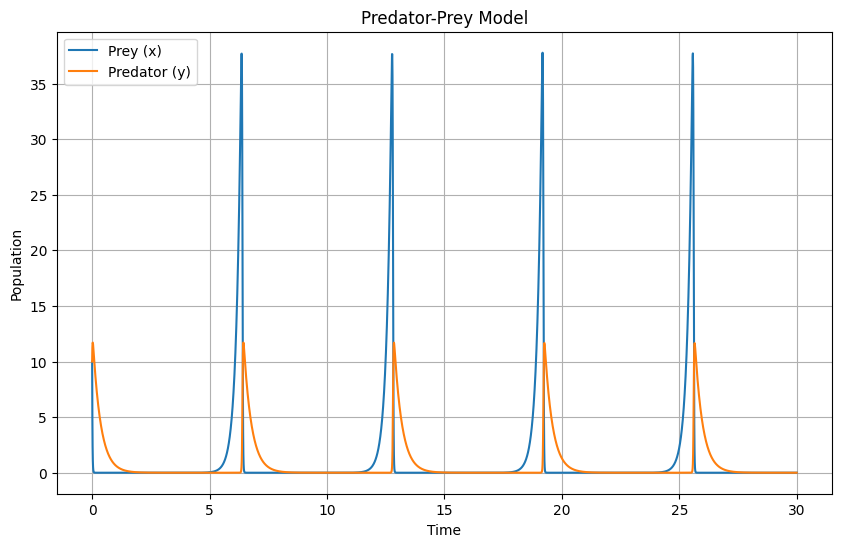

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def predator_prey_model(x, y, a, b, c, d):
    dxdt = a*x - c*x*y
    dydt = d*x*y - b*y
    return dxdt, dydt

def runge_kutta(f, x0, y0, a, b, c, d, t0, tf, h):
    num_steps = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, num_steps + 1)
    x_values = np.zeros(num_steps + 1)
    y_values = np.zeros(num_steps + 1)
    x_values[0] = x0
    y_values[0] = y0

    for i in range(num_steps):
        k1x, k1y = f(x_values[i], y_values[i], a, b, c, d)
        k2x, k2y = f(x_values[i] + 0.5*h*k1x, y_values[i] + 0.5*h*k1y, a, b, c, d)
        k3x, k3y = f(x_values[i] + 0.5*h*k2x, y_values[i] + 0.5*h*k2y, a, b, c, d)
        k4x, k4y = f(x_values[i] + h*k3x, y_values[i] + h*k3y, a, b, c, d)
        x_values[i+1] = x_values[i] + (h/6.0) * (k1x + 2*k2x + 2*k3x + k4x)
        y_values[i+1] = y_values[i] + (h/6.0) * (k1y + 2*k2y + 2*k3y + k4y)

    return t_values, x_values, y_values

# 初期条件
x0 = 10.0  # 初期被食者数
y0 = 10.0   # 初期捕食者数
t0 = 0.0
tf = 30.0
h = 0.01

# パラメータ
a = 5   # 被食者の成長率
b = 3  # 捕食者の減少率
c = 7  # 被食者の捕食率
d = 2 # 捕食者の増加率

# ルンゲ・クッタ法で解を計算
t_values, x_values, y_values = runge_kutta(predator_prey_model, x0, y0, a, b, c, d, t0, tf, h)

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label='Prey (x)')
plt.plot(t_values, y_values, label='Predator (y)')
plt.title('Predator-Prey Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

# CSVファイルからデータを読み込む
data = pd.read_csv('drive/MyDrive/修士_渡邉/master/数値解析例題/hosyokudata.csv')

# データから必要な列を取得
years = data['year'].values
rabbits = data['rabbit'].values
cats = data['wildcat'].values




In [30]:
print(data.isnull().sum())  # 欠損値があるかどうかを確認
print(np.any(np.isnan(years)))  # NaNがあるかどうかを確認
print(np.any(np.isnan(rabbits)))  # NaNがあるかどうかを確認
print(np.any(np.isnan(cats)))  # NaNがあるかどうかを確認

year       0
rabbit     0
wildcat    0
dtype: int64
False
False
False


In [29]:
# 欠損値を中央値で補完する
data.fillna(data.median(), inplace=True)

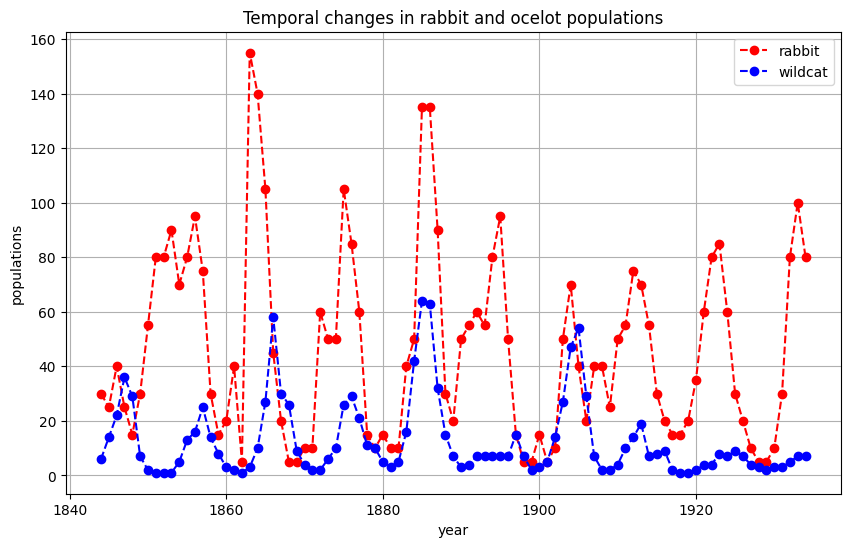

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
# 欠損値を中央値で補完する
data.fillna(data.median(), inplace=True)

# 年ごとのウサギと山猫の個体数をプロットする
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['rabbit'], marker='o', linestyle='--', color='r', label='rabbit')
plt.plot(data['year'], data['wildcat'], marker='o', linestyle='--', color='b', label='wildcat')
plt.title('Temporal changes in rabbit and ocelot populations')
plt.xlabel('year')
plt.ylabel('populations')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
# モデル関数
def predator_prey_model(t, a, b, c, d):
    x = a * rabbits - c * rabbits * cats
    y = d * rabbits * cats - b * cats
    #return x, y
    return np.concatenate((x, y)) ## 出力を1次元配列に結合する
# 初期推定値
initial_guess = [0.1, 0.1, 0.1, 0.1]

# パラメータの推定
params, covariance = curve_fit(predator_prey_model, years, np.concatenate((rabbits, cats)), p0=initial_guess)

# 推定されたパラメータ
a, b, c, d = params

print("Estimated parameters:")
print("a (Rabbit growth rate):", a)
print("b (Cat death rate):", b)
print("c (Predation rate):", c)
print("d (Cat birth rate):", d)

Estimated parameters:
a (Rabbit growth rate): 0.9999999999959709
b (Cat death rate): -1.0000000023104658
c (Predation rate): -2.180894353998042e-13
d (Cat birth rate): -2.530225669792858e-11


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


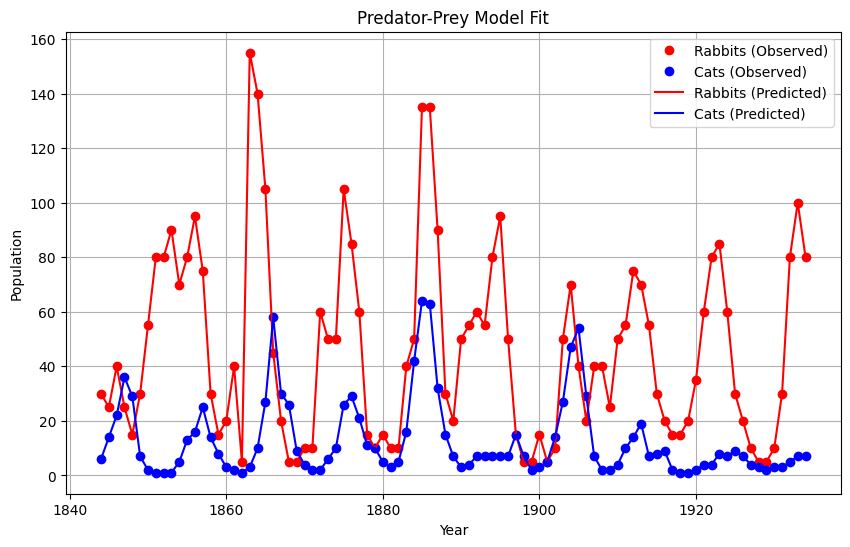

In [54]:
# 結果をプロット
plt.figure(figsize=(10, 6))
plt.plot(years, rabbits, 'ro', label='Rabbits (Observed)')
plt.plot(years, cats, 'bo', label='Cats (Observed)')
plt.plot(years, predator_prey_model(years, a, b, c, d)[:len(years)], 'r-', label='Rabbits (Predicted)')
plt.plot(years, predator_prey_model(years, a, b, c, d)[len(years):], 'b-', label='Cats (Predicted)')
plt.title('Predator-Prey Model Fit')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
# 予測する年のリスト
future_years = [2022, 2023, 2024, 2025]

# 将来の個体数を予測
future_rabbits = predator_prey_model(future_years, a, b, c, d)[:len(future_years)]
future_cats = predator_prey_model(future_years, a, b, c, d)[len(future_years):]

# 結果を出力
for year, rabbit, cat in zip(future_years, future_rabbits, future_cats):
    print(f"Year {year}: Predicted Rabbits = {rabbit}, Predicted Cats = {cat}")


Year 2022: Predicted Rabbits = 29.999999999918384, Predicted Cats = 15.000000000034431
Year 2023: Predicted Rabbits = 24.999999999975604, Predicted Cats = 29.999999999924924
Year 2024: Predicted Rabbits = 40.00000000003075, Predicted Cats = 54.999999999802384
Year 2025: Predicted Rabbits = 25.000000000095554, Predicted Cats = 79.99999999969512


ValueError: x and y must have same first dimension, but have shapes (10,) and (172,)

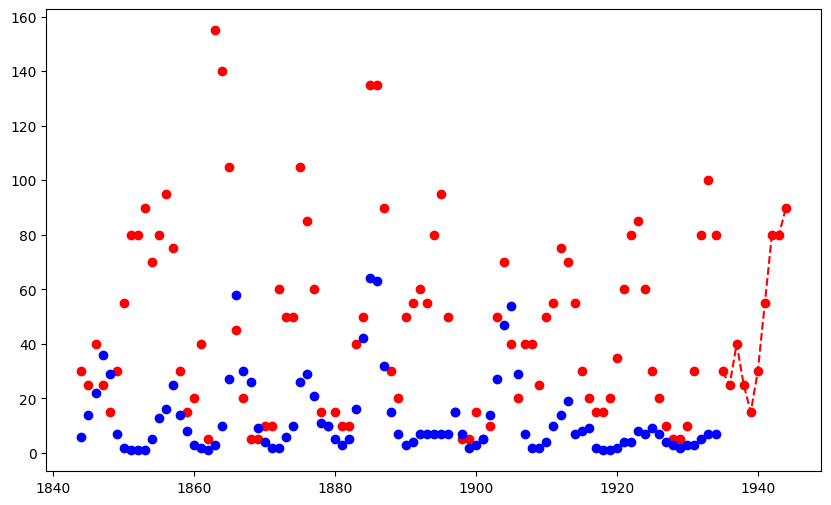

In [55]:
# 予測する年のリスト
future_years = list(range(max(years) + 1, max(years) + 11))

# 将来の個体数を予測
future_rabbits = predator_prey_model(future_years, a, b, c, d)[:len(future_years)]
future_cats = predator_prey_model(future_years, a, b, c, d)[len(future_years):]

# 可視化
plt.figure(figsize=(10, 6))
plt.plot(years, rabbits, 'ro', label='Rabbits (Observed)')
plt.plot(years, cats, 'bo', label='Cats (Observed)')
plt.plot(future_years, future_rabbits, 'r--o', label='Predicted Rabbits (Future)')
plt.plot(future_years, future_cats, 'b--o', label='Predicted Cats (Future)')
plt.title('Predator-Prey Model Prediction for Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()



In [45]:
# モデルの算出値を取得
predicted_rabbits = predator_prey_model(years, a, b, c, d)[:len(years)]
predicted_cats = predator_prey_model(years, a, b, c, d)[len(years):]

# 誤差を計算
residuals_rabbits = rabbits - predicted_rabbits
residuals_cats = cats - predicted_cats

# 誤差を出力
print("Rabbits Residuals:", residuals_rabbits)
print("Cats Residuals:", residuals_cats)

# 平均二乗誤差（MSE）を計算
mse_rabbits = np.mean(residuals_rabbits**2)
mse_cats = np.mean(residuals_cats**2)

print("Mean Squared Error (Rabbits):", mse_rabbits)
print("Mean Squared Error (Cats):", mse_cats)


Rabbits Residuals: [ 8.16164913e-11  2.43964848e-11 -3.07522896e-11 -9.55537871e-11
 -3.44311246e-11  7.50759455e-11  1.97616146e-10  3.04879677e-10
  3.04879677e-10  3.42993189e-10  2.05716333e-10  9.55111545e-11
  5.12727638e-11 -1.06737730e-10  2.92779134e-11  3.42659234e-11
  6.74980072e-11  1.43721479e-10  1.90549798e-11  5.23101562e-10
  2.58751243e-10 -1.95228722e-10 -3.87906596e-10 -5.02708986e-11
 -8.20588042e-12  1.03312914e-11  3.15676374e-11  3.59303698e-11
  2.15578666e-10  1.36026301e-10  9.24060828e-11 -1.72320824e-10
 -1.95129246e-10 -3.30473426e-11  2.44515519e-11  1.84829929e-11
  4.40802950e-11  3.37490036e-11  2.93862712e-11  2.15862883e-11
 -2.56534349e-10 -1.34036782e-09 -1.31092293e-09 -2.65472977e-10
  2.27338148e-11  5.00506303e-11  1.68739689e-10  1.73621117e-10
  1.50151891e-10  1.37639233e-10  2.00202521e-10  2.37733389e-10
  1.25119470e-10  1.13669074e-11  1.25126576e-11  1.79651849e-11
  5.06226172e-11  1.46931356e-11  9.75930448e-12 -9.29674115e-11
 -4.35